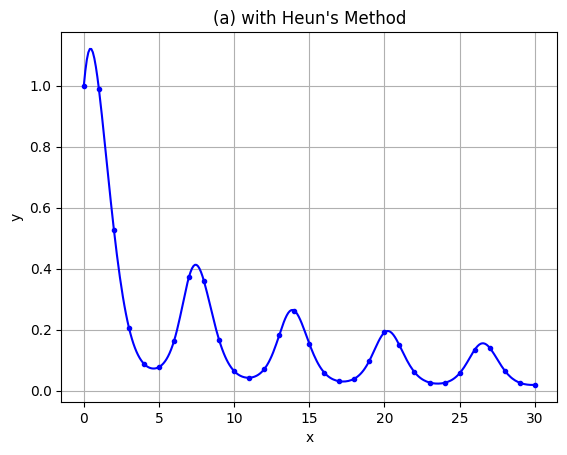

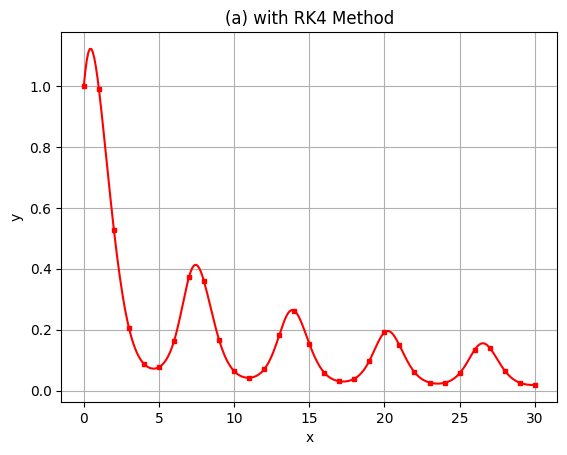

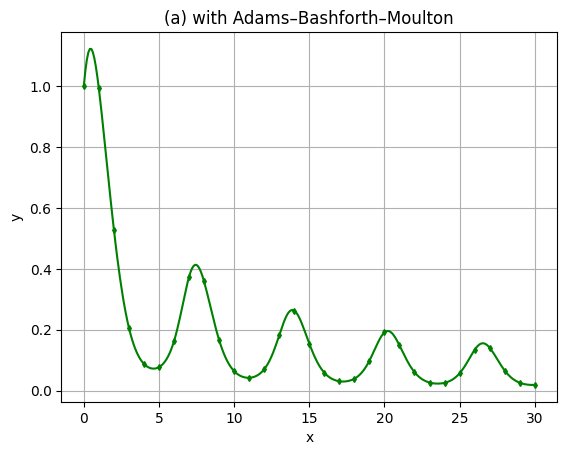

Max difference (Heun vs RK4): 0.0012082860873712242
Max difference (RK4 vs Adams): 0.00017183138641785334


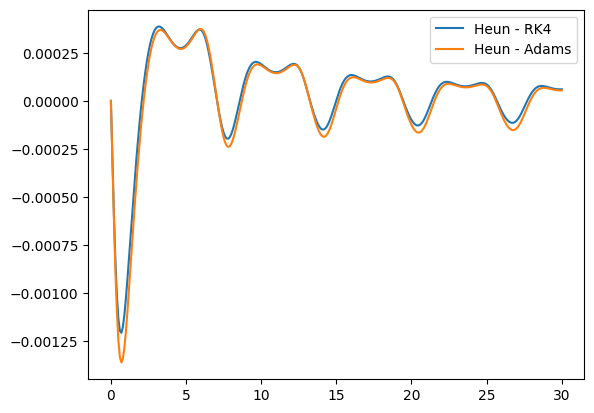

In [12]:
# (a): y' = y * cos(x + y)
import numpy as np
import matplotlib.pyplot as plt

def f_a(x, y):
    return y * np.cos(x + y)


# 1) Heun's Method
def heuns(f, x0, y0, x_end, h):
    N = int((x_end - x0) / h) # number of steps
    x_vals = np.zeros(N+1) # initializing arrays
    y_vals = np.zeros(N+1)
    
    x_vals[0] = x0
    y_vals[0] = y0
    
    # loop
    for n in range(N):
        x_n = x_vals[n]
        y_n = y_vals[n]
        y_tilde = y_n + h * f(x_n, y_n)  
        # corrector
        f_n       = f(x_n, y_n)
        f_tilde   = f(x_n + h, y_tilde)
        y_np1     = y_n + (h/2.0)*(f_n + f_tilde)
        x_vals[n+1] = x_n + h
        y_vals[n+1] = y_np1
    
    return x_vals, y_vals

# 2) 4th order Runge - Kutta

def rk4(f, x0, y0, x_end, h):
    N = int((x_end - x0) / h)
    x_vals = np.zeros(N+1)
    y_vals = np.zeros(N+1)
    
    x_vals[0], y_vals[0] = x0, y0
    
    for n in range(N):
        x_n = x_vals[n]
        y_n = y_vals[n]
        
        k1 = f(x_n,          y_n)
        k2 = f(x_n + 0.5*h,  y_n + 0.5*h*k1)
        k3 = f(x_n + 0.5*h,  y_n + 0.5*h*k2)
        k4 = f(x_n + h,      y_n + h*k3)
        
        y_vals[n+1] = y_n + (h/6.0)*(k1 + 2*k2 + 2*k3 + k4)
        x_vals[n+1] = x_n + h
    
    return x_vals, y_vals

# 3) Adams method
def adams(f, x0, y0, x_end, h):
    N = int((x_end - x0) / h)
    
    x_vals = np.zeros(N+1)
    y_vals = np.zeros(N+1)
    
    x_vals[0] = x0
    y_vals[0] = y0
    
    # step 0 -> 1 with RK4 
    k1 = f(x0,           y0)
    k2 = f(x0 + 0.5*h,   y0 + 0.5*h*k1)
    k3 = f(x0 + 0.5*h,   y0 + 0.5*h*k2)
    k4 = f(x0 + h,       y0 + h*k3)
    y1 = y0 + (h/6.0)*(k1 + 2*k2 + 2*k3 + k4)
    
    x_vals[1] = x0 + h
    y_vals[1] = y1

    # loop from n=1 to N-1
    for n in range(1, N):
        x_n     = x_vals[n]
        y_n     = y_vals[n]
        x_nm1   = x_vals[n-1]
        y_nm1   = y_vals[n-1]
        
        # prediction y_{n+1} = y_n + h/2 [3 f(x_n, y_n) - f(x_{n-1}, y_{n-1})]
        f_n     = f(x_n,   y_n)
        f_nm1   = f(x_nm1, y_nm1)
        y_pred  = y_n + (h/2.0)*(3.0*f_n - f_nm1)
        x_next  = x_n + h
        
        # correction y_{n+1} = y_n + h/12 [5 f(x_{n+1}, y_pred) + 8 f_n - f_nm1]
        f_pred  = f(x_next, y_pred)
        y_np1   = y_n + (h/12.0)*(5.0*f_pred + 8.0*f_n - f_nm1)
        
        x_vals[n+1] = x_next
        y_vals[n+1] = y_np1
    
    return x_vals, y_vals

# solution with [0,30] with h=0.1
def main():
    x0     = 0.0
    y0     = 1.0
    x_end  = 30.0
    h      = 0.1
    
    # 1) Heun's
    x_heun, y_heun = heuns(f_a, x0, y0, x_end, h)
    plt.figure() 
    plt.plot(x_heun, y_heun, 'b-o', markersize=3, markevery=10)
    plt.title("(a) with Heun's Method")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.grid(True)
    plt.show()
    
    # 2) RK4
    x_rk4, y_rk4 = rk4(f_a, x0, y0, x_end, h)
    plt.figure()  
    plt.plot(x_rk4, y_rk4, 'r-s', markersize=3, markevery=10)
    plt.title("(a) with RK4 Method")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.grid(True)
    plt.show()
    
    # 3) Adams–Bashforth–Moulton
    x_adams, y_adams = adams(f_a, x0, y0, x_end, h)
    plt.figure()  
    plt.plot(x_adams, y_adams, 'g-d', markersize=3, markevery=10)
    plt.title("(a) with Adams–Bashforth–Moulton")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.grid(True)
    plt.show()

    return (x_heun, y_heun, x_rk4, y_rk4, x_adams, y_adams)

if __name__ == "__main__":
    x_heun, y_heun, x_rk4, y_rk4, x_adams, y_adams = main()
    
    diff_heun_vs_rk4   = np.max(np.abs(y_heun - y_rk4))
    diff_rk4_vs_adams  = np.max(np.abs(y_rk4 - y_adams))
    print("Max difference (Heun vs RK4):", diff_heun_vs_rk4)
    print("Max difference (RK4 vs Adams):", diff_rk4_vs_adams)

    # difference plots:
    plt.plot(x_heun, y_heun - y_rk4, label="Heun - RK4")
    plt.plot(x_heun, y_heun - y_adams, label="Heun - Adams")
    plt.legend()
    plt.show()


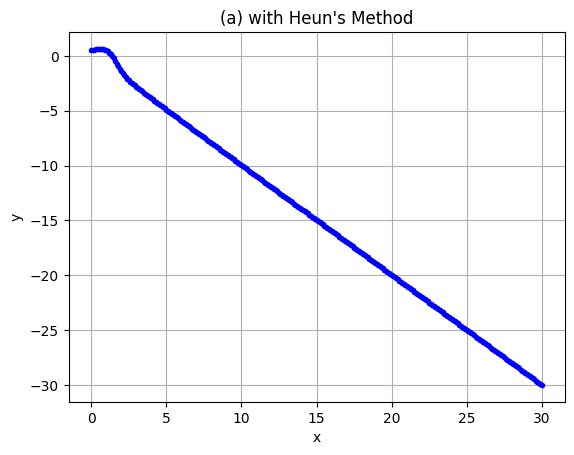

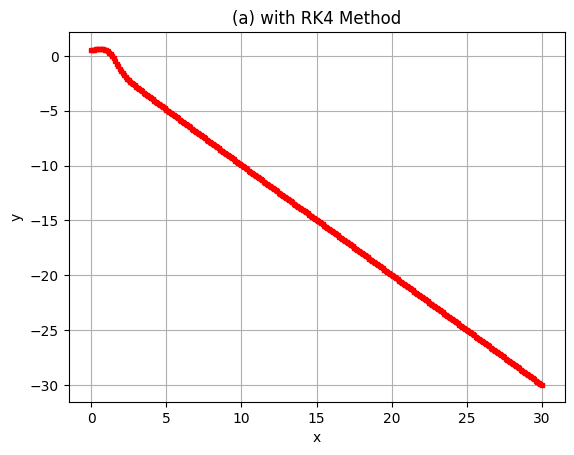

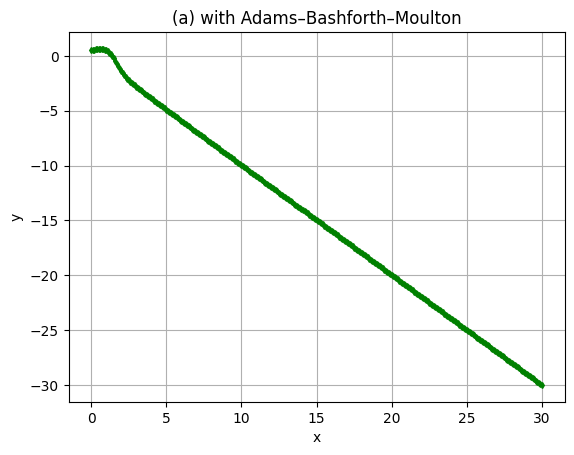

Max difference (Heun vs RK4): 4.114010732236828e-05
Max difference (RK4 vs Adams): 1.7030496830550135e-06


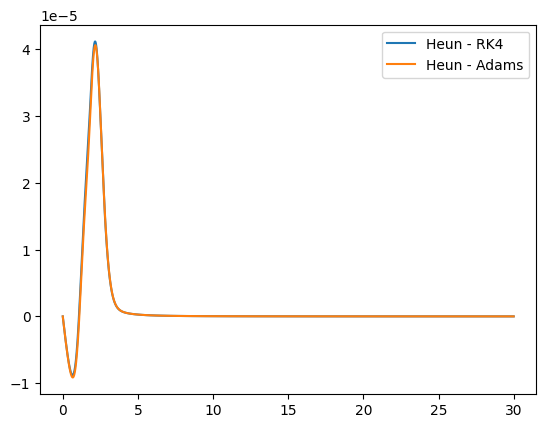

In [30]:
# (e)
import numpy as np
import matplotlib.pyplot as plt

def f_e(x, y):
    return y**2 - x**2

# 1) Heun's Method
def heuns(f, x0, y0, x_end, h):
    N = int((x_end - x0) / h) # number of steps
    x_vals = np.zeros(N+1) # initializing arrays
    y_vals = np.zeros(N+1)
    
    x_vals[0] = x0
    y_vals[0] = y0
    
    # loop
    for n in range(N):
        x_n = x_vals[n]
        y_n = y_vals[n]
        y_tilde = y_n + h * f(x_n, y_n)  
        # corrector
        f_n       = f(x_n, y_n)
        f_tilde   = f(x_n + h, y_tilde)
        y_np1     = y_n + (h/2.0)*(f_n + f_tilde)
        x_vals[n+1] = x_n + h
        y_vals[n+1] = y_np1
    
    return x_vals, y_vals

# 2) 4th order Runge - Kutta

def rk4(f, x0, y0, x_end, h):
    N = int((x_end - x0) / h)
    x_vals = np.zeros(N+1)
    y_vals = np.zeros(N+1)
    
    x_vals[0], y_vals[0] = x0, y0
    
    for n in range(N):
        x_n = x_vals[n]
        y_n = y_vals[n]
        
        k1 = f(x_n,          y_n)
        k2 = f(x_n + 0.5*h,  y_n + 0.5*h*k1)
        k3 = f(x_n + 0.5*h,  y_n + 0.5*h*k2)
        k4 = f(x_n + h,      y_n + h*k3)
        
        y_vals[n+1] = y_n + (h/6.0)*(k1 + 2*k2 + 2*k3 + k4)
        x_vals[n+1] = x_n + h
    
    return x_vals, y_vals

# 3) Adams method
def adams(f, x0, y0, x_end, h):
    N = int((x_end - x0) / h)
    
    x_vals = np.zeros(N+1)
    y_vals = np.zeros(N+1)
    
    x_vals[0] = x0
    y_vals[0] = y0
    
    # step 0 -> 1 with RK4 
    k1 = f(x0,           y0)
    k2 = f(x0 + 0.5*h,   y0 + 0.5*h*k1)
    k3 = f(x0 + 0.5*h,   y0 + 0.5*h*k2)
    k4 = f(x0 + h,       y0 + h*k3)
    y1 = y0 + (h/6.0)*(k1 + 2*k2 + 2*k3 + k4)
    
    x_vals[1] = x0 + h
    y_vals[1] = y1

    # loop from n=1 to N-1
    for n in range(1, N):
        x_n     = x_vals[n]
        y_n     = y_vals[n]
        x_nm1   = x_vals[n-1]
        y_nm1   = y_vals[n-1]
        
        # prediction y_{n+1} = y_n + h/2 [3 f(x_n, y_n) - f(x_{n-1}, y_{n-1})]
        f_n     = f(x_n,   y_n)
        f_nm1   = f(x_nm1, y_nm1)
        y_pred  = y_n + (h/2.0)*(3.0*f_n - f_nm1)
        x_next  = x_n + h
        
        # correction y_{n+1} = y_n + h/12 [5 f(x_{n+1}, y_pred) + 8 f_n - f_nm1]
        f_pred  = f(x_next, y_pred)
        y_np1   = y_n + (h/12.0)*(5.0*f_pred + 8.0*f_n - f_nm1)
        
        x_vals[n+1] = x_next
        y_vals[n+1] = y_np1
    
    return x_vals, y_vals

# solution with [0,30] with h=0.1
def main():
    x0     = 0.0
    y0     = 1/2
    x_end  = 30.0
    h      = 0.01
    
    # 1) Heun's
    x_heun, y_heun = heuns(f_e, x0, y0, x_end, h)
    plt.figure() 
    plt.plot(x_heun, y_heun, 'b-o', markersize=3, markevery=10)
    plt.title("(a) with Heun's Method")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.grid(True)
    plt.show()
    
    # 2) RK4
    x_rk4, y_rk4 = rk4(f_e, x0, y0, x_end, h)
    plt.figure()  
    plt.plot(x_rk4, y_rk4, 'r-s', markersize=3, markevery=10)
    plt.title("(a) with RK4 Method")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.grid(True)
    plt.show()
    
    # 3) Adams–Bashforth–Moulton
    x_adams, y_adams = adams(f_e, x0, y0, x_end, h)
    plt.figure()  
    plt.plot(x_adams, y_adams, 'g-d', markersize=3, markevery=10)
    plt.title("(a) with Adams–Bashforth–Moulton")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.grid(True)
    plt.show()

    return (x_heun, y_heun, x_rk4, y_rk4, x_adams, y_adams)

if __name__ == "__main__":
    x_heun, y_heun, x_rk4, y_rk4, x_adams, y_adams = main()
    
    diff_heun_vs_rk4   = np.max(np.abs(y_heun - y_rk4))
    diff_rk4_vs_adams  = np.max(np.abs(y_rk4 - y_adams))
    print("Max difference (Heun vs RK4):", diff_heun_vs_rk4)
    print("Max difference (RK4 vs Adams):", diff_rk4_vs_adams)

    # difference plots:
    plt.plot(x_heun, y_heun - y_rk4, label="Heun - RK4")
    plt.plot(x_heun, y_heun - y_adams, label="Heun - Adams")
    plt.legend()
    plt.show()

In this section i encountred some overflow warning so increased the step size to h=0.01